In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings as w
import os
w.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [5]:
df= pd.read_csv('dataset/Final_data.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,26.800377,1.50,3.99,2.01,24.87,2.99,0.01,267.68,106.05,71.63,1806.0,Other,Lunch,Vegan,31.77,1729.94,285.05,120.47,Grilled,16.24,110.79,1.31,Decline Push-ups,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,27.655021,1.90,4.00,2.01,23.48,3.01,0.97,214.32,85.41,56.97,1577.0,Other,Lunch,Vegetarian,12.34,693.08,300.61,109.15,Fried,16.47,12.01,1.92,Bear Crawls,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,24.320821,1.88,2.99,1.02,21.15,1.99,-0.02,246.04,98.11,65.48,1608.0,Other,Breakfast,Paleo,42.81,2142.48,215.42,399.43,Boiled,54.35,6.09,4.70,Dips,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,32.813572,2.50,3.99,1.99,32.45,3.00,0.04,203.22,80.84,54.56,2657.0,Other,Lunch,Paleo,9.34,123.20,9.70,314.31,Fried,27.73,103.72,4.85,Mountain Climbers,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,17.307319,2.91,4.00,2.00,14.83,3.00,3.00,332.79,133.05,88.43,1470.0,Other,Breakfast,Vegan,23.78,1935.11,116.89,99.22,Baked,34.16,46.55,3.07,Bicep Curls,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [7]:
df.shape

(20000, 54)

In [8]:
num = df.select_dtypes(include=['number']).columns.tolist()
cat = df.select_dtypes(include=['object']).columns.tolist()

In [9]:
def x_tr(df, num_cols):
    df[num_cols] = df[num_cols].round()
    return df
x_tr(df,num)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,35.0,Male,65.0,2.0,189.0,158.0,69.0,1.0,1081.0,Strength,27.0,2.0,4.0,2.0,25.0,3.0,0.0,268.0,106.0,72.0,1806.0,Other,Lunch,Vegan,32.0,1730.0,285.0,120.0,Grilled,16.0,111.0,1.0,Decline Push-ups,5.0,21.0,Improves shoulder health and posture,343.0,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes,25.0,2140.0,1.0,2.0,1.0,1.0,725.0,48.0,685.0,7.260425e+19,Medium
1,23.0,Female,56.0,2.0,179.0,132.0,73.0,1.0,1810.0,HIIT,28.0,2.0,4.0,2.0,23.0,3.0,1.0,214.0,85.0,57.0,1577.0,Other,Lunch,Vegetarian,12.0,693.0,301.0,109.0,Fried,16.0,12.0,2.0,Bear Crawls,4.0,16.0,Strengthens lower abs,357.0,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises,23.0,1712.0,1.0,2.0,1.0,1.0,-233.0,41.0,979.0,1.020506e+20,High
2,33.0,Female,59.0,2.0,175.0,124.0,55.0,1.0,802.0,Cardio,24.0,2.0,3.0,1.0,21.0,2.0,-0.0,246.0,98.0,65.0,1608.0,Other,Breakfast,Paleo,43.0,2142.0,215.0,399.0,Boiled,54.0,6.0,5.0,Dips,5.0,22.0,Builds chest strength,360.0,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises,21.0,1966.0,1.0,2.0,1.0,1.0,806.0,45.0,655.0,1.079607e+20,High
3,39.0,Female,94.0,2.0,191.0,155.0,50.0,1.0,1451.0,HIIT,33.0,2.0,4.0,2.0,32.0,3.0,0.0,203.0,81.0,55.0,2657.0,Other,Lunch,Paleo,9.0,123.0,10.0,314.0,Fried,28.0,104.0,5.0,Mountain Climbers,4.0,17.0,Improves coordination and cardiovascular health,352.0,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes,32.0,1627.0,0.0,1.0,1.0,1.0,1206.0,63.0,774.0,8.987921e+19,High
4,45.0,Male,52.0,2.0,194.0,153.0,71.0,1.0,1166.0,Strength,17.0,3.0,4.0,2.0,15.0,3.0,3.0,333.0,133.0,88.0,1470.0,Other,Breakfast,Vegan,24.0,1935.0,117.0,99.0,Baked,34.0,47.0,3.0,Bicep Curls,5.0,15.0,Targets obliques and improves core rotation,329.0,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press,15.0,2659.0,1.0,3.0,1.0,1.0,304.0,43.0,711.0,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,47.0,Female,98.0,2.0,199.0,148.0,64.0,1.0,762.0,Strength,28.0,3.0,3.0,1.0,27.0,3.0,0.0,235.0,94.0,63.0,2627.0,Other,Breakfast,Low-Carb,33.0,1241.0,244.0,191.0,Boiled,42.0,92.0,4.0,Frog Jumps,5.0,17.0,Improves cardiovascular fitness,346.0,"Quadriceps, Hamstrings, Glutes",Box or Platform,Advanced,Arms,Anterior,Triceps pushdowns,27.0,1883.0,0.0,1.0,1.0,1.0,1865.0,71.0,533.0,7.924402e+19,Medium
19996,40.0,Female,88.0,2.0,196.0,134.0,54.0,2.0,2303.0,Strength,26.0,4.0,5.0,3.0,25.0,3.0,-0.0,150.0,61.0,40.0,2477.0,Other,Snack,Vegetarian,32.0,1853.0,189.0,469.0,Boiled,21.0,13.0,2.0,Pull-ups,5.0,23.0,Strengthens back and legs,333.0,"Core, Shoulders, Hips",Dumbbells or Barbell,Intermediate,Arms,Lats,Seated calf raises,25.0,1205.0,0.0,1.0,1.0,1.0,174.0,65.0,1311.0,5.708474e+19,Low
19997,50.0,Male,46.0,2.0,163.0,158.0,62.0,1.0,1469.0,Strength,23.0,3.0,4.0,2.0,17.0,3.0,-0.0,244.0,97.0,65.0,1425.0,Other,Snack,Keto,14.0,1808.0,80.0,245.0,Grilled,23.0,61.0,2.0,Dips,4.0,19.0,Builds shoulder width,352.0,"Upper Back, Rear Deltoids",Barbell,Beginner,Forearms,Wrist Extensors,Russian twists,17.0,1948.0,1.0,2.0,1.0,1.0,-44.0,35.0,958.0,9.101285e+19,High
19998,52.0,Male,44.0,2.0,179

In [10]:
df.isna().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [14]:
print('Categorical columns: ', cat)
print(f'Numbers of categorical columns: {len(cat)}\n')

print('Numerical columns: ', num)
print(f'Numbers of Numerical columns: {len(num)}')

Categorical columns:  ['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'Burns_Calories_Bin']
Numbers of categorical columns: 15

Numerical columns:  ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc']
Numbers of Numerical columns: 39


In [24]:
cols = ['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Equipment Needed', 
        'Difficulty Level', 'Body Part', 'Type of Muscle', 'Burns_Calories_Bin']

output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)
print(f"Saving plots to '{output_dir}' directory...")

for col in cols:
    plt.figure(figsize=(10, 6)) 
    
    try:
        ax = sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
    except ValueError:
        ax = sns.countplot(x=col, data=df, palette='Set2')
        
    plt.title(f'{col} Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('') 
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, 
                    height + (0.01 * height), 
                    f'{int(height):,}',
                    ha='center', 
                    va='bottom', 
                    fontsize=9,
                    fontweight='bold')
    
    plt.tight_layout()
    safe_col_name = col.replace(' ', '_').replace('/', '_')
    filename = os.path.join(output_dir, f"{safe_col_name}.png")
    
    plt.savefig(filename)
    plt.close()

print(f"Successfully saved {len(cols)} plots.")


Saving plots to 'output' directory...
Successfully saved 11 plots.


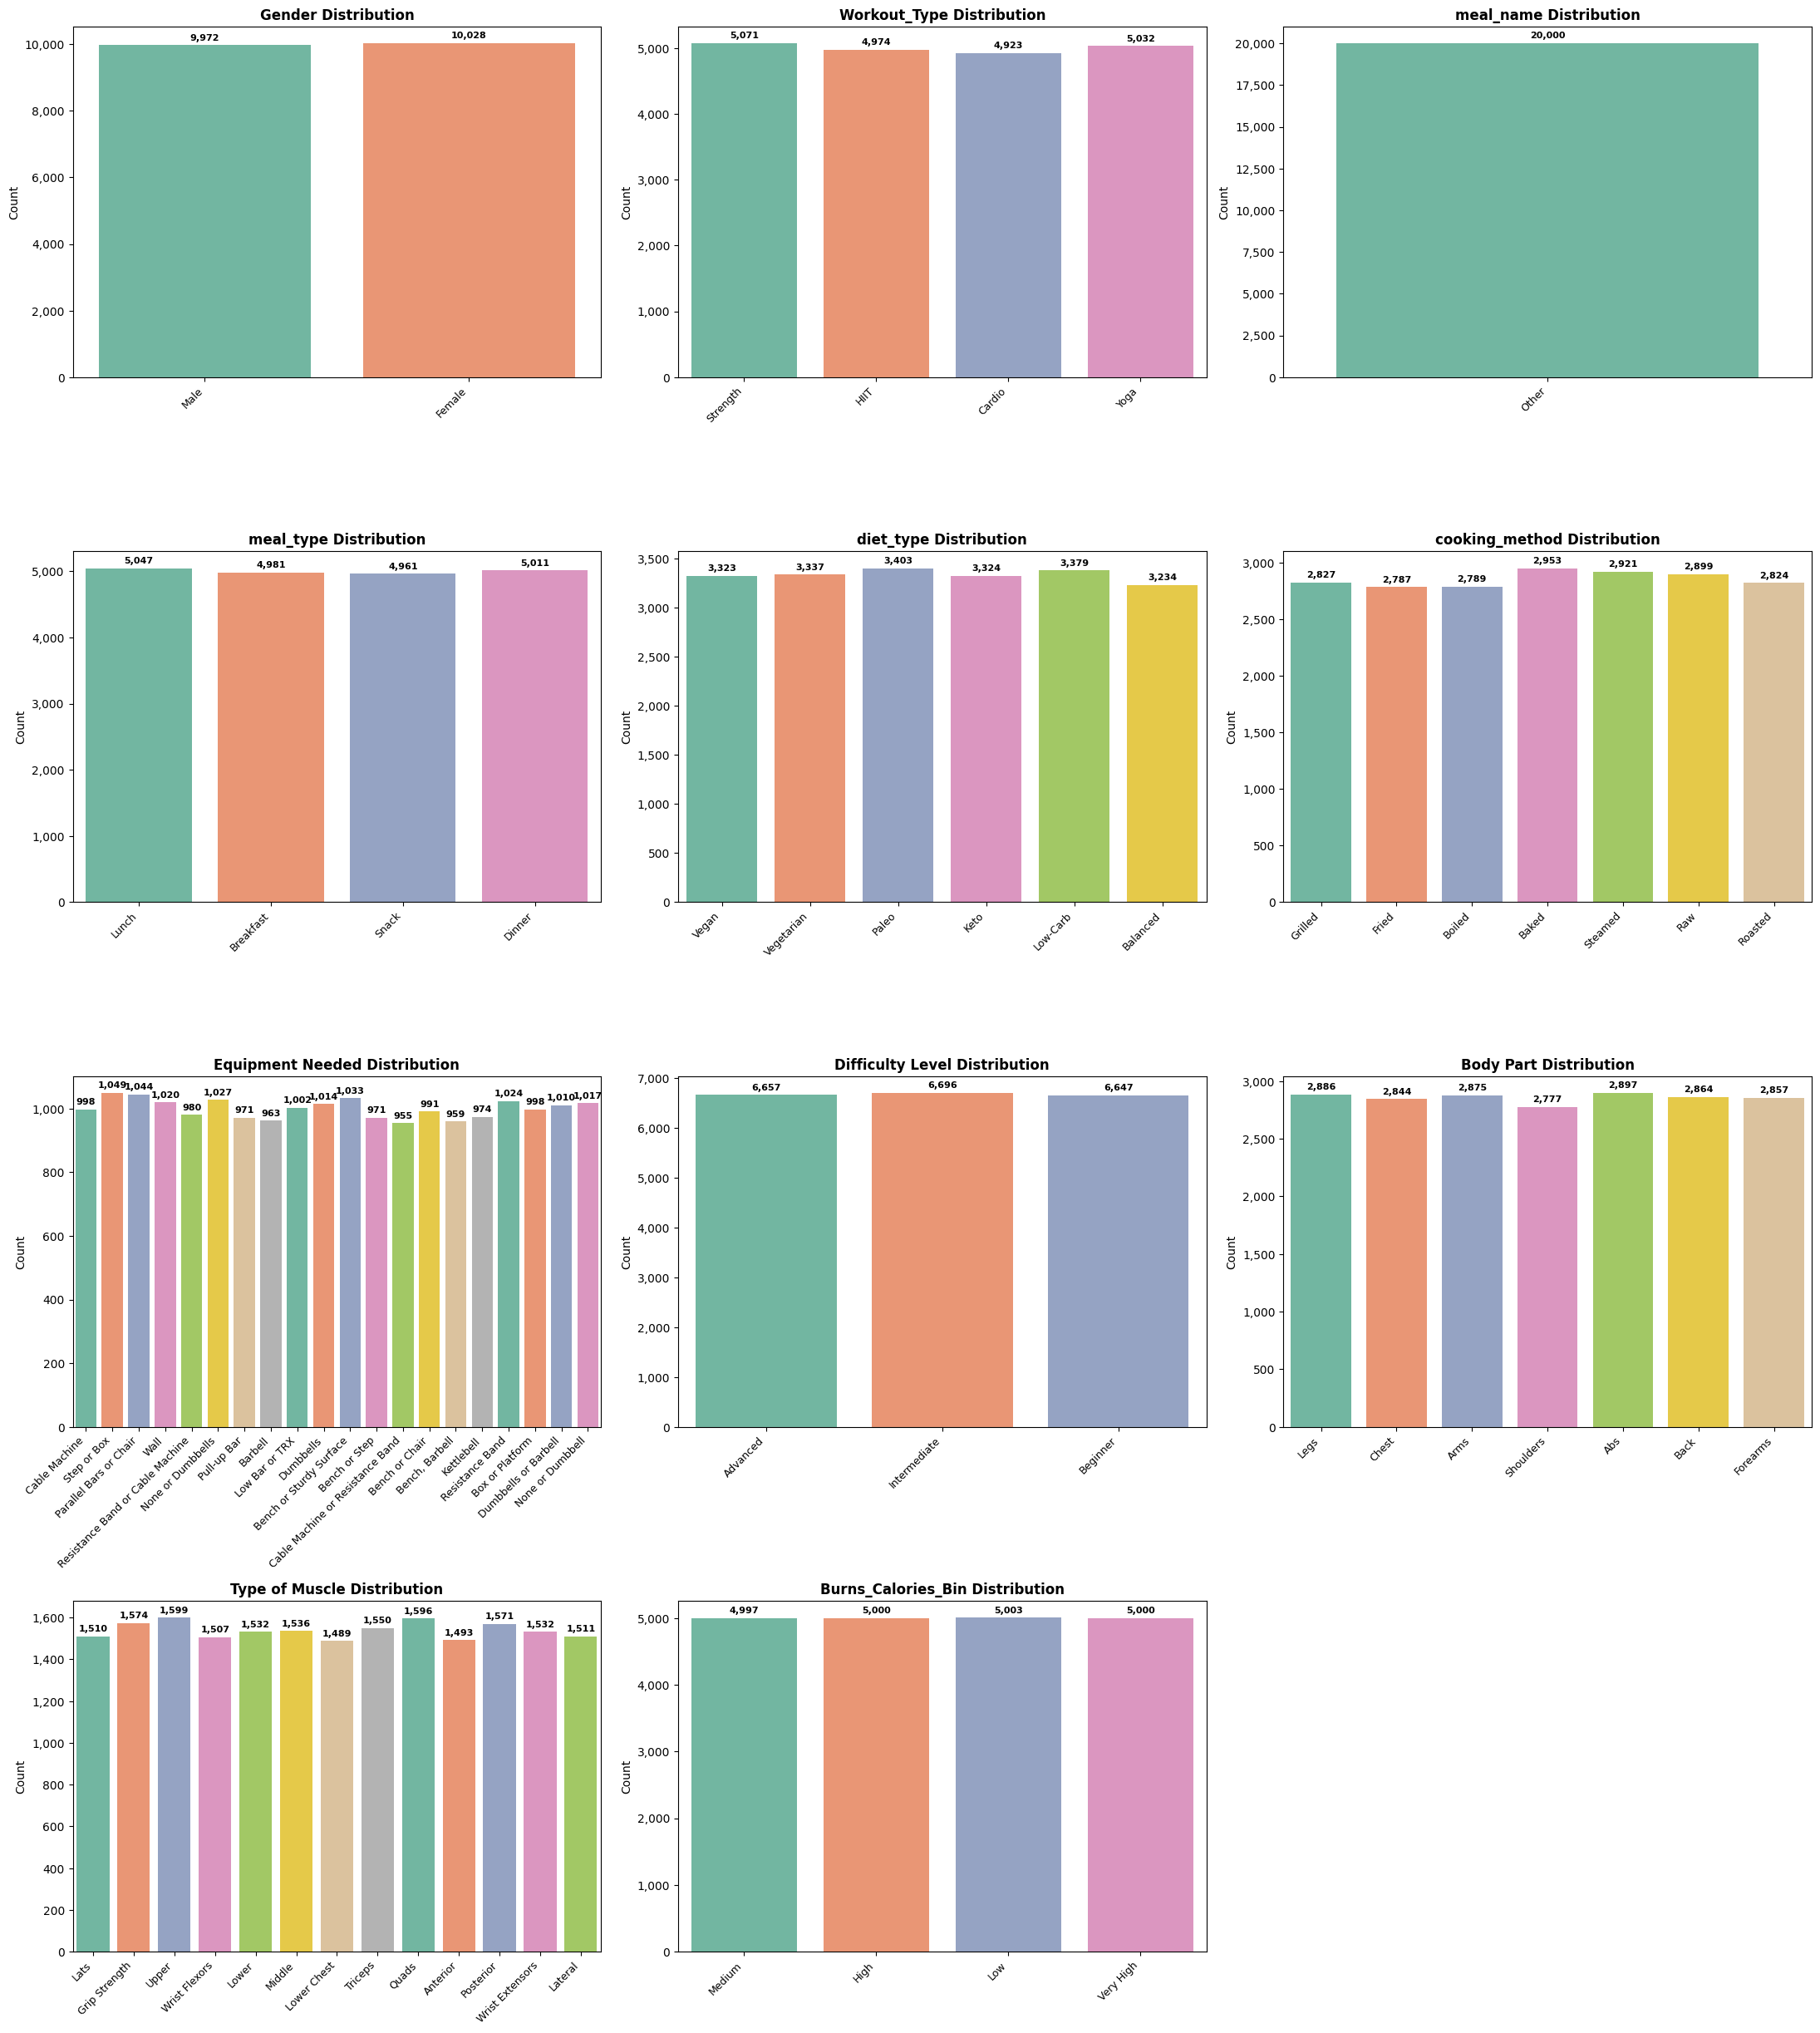

In [25]:
plt.figure(figsize=(22, 30))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 3, i)
    ax = sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'{col} Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + (0.01 * height),
                f'{int(height):,}', ha='center', va='bottom', fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
cols = ['Workout', 'Name of Exercise', 'Benefit', 'Target Muscle Group']

output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)
saved_files_top10 = []

print(f"\nSaving new top-10 plots to '{output_dir}' directory...")

for col in cols:
    plt.figure(figsize=(12, 8)) 
    counts = df[col].value_counts().nlargest(10)
    ax = sns.barplot(x=counts.values, y=counts.index, palette='Set3')
    
    plt.title(f'Top 10 {col}', fontsize=13, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel(col)
    
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    
    for j, val in enumerate(counts.values):
        ax.text(val + (0.01 * counts.values.max()), 
                j, 
                f'{int(val):,}', 
                va='center',
                fontsize=9, 
                fontweight='bold')
    
    plt.tight_layout()
    
    safe_col_name = col.replace(' ', '_').replace('/', '_')
    filename = os.path.join(output_dir, f"{safe_col_name}_top10.png")
    plt.savefig(filename)
    plt.close()
    saved_files_top10.append(filename)

print(f"Successfully saved {len(saved_files_top10)} new top-10 plots:")
print("\n".join(saved_files_top10))


Saving new top-10 plots to 'output' directory...
Successfully saved 4 new top-10 plots:
output\Workout_top10.png
output\Name_of_Exercise_top10.png
output\Benefit_top10.png
output\Target_Muscle_Group_top10.png


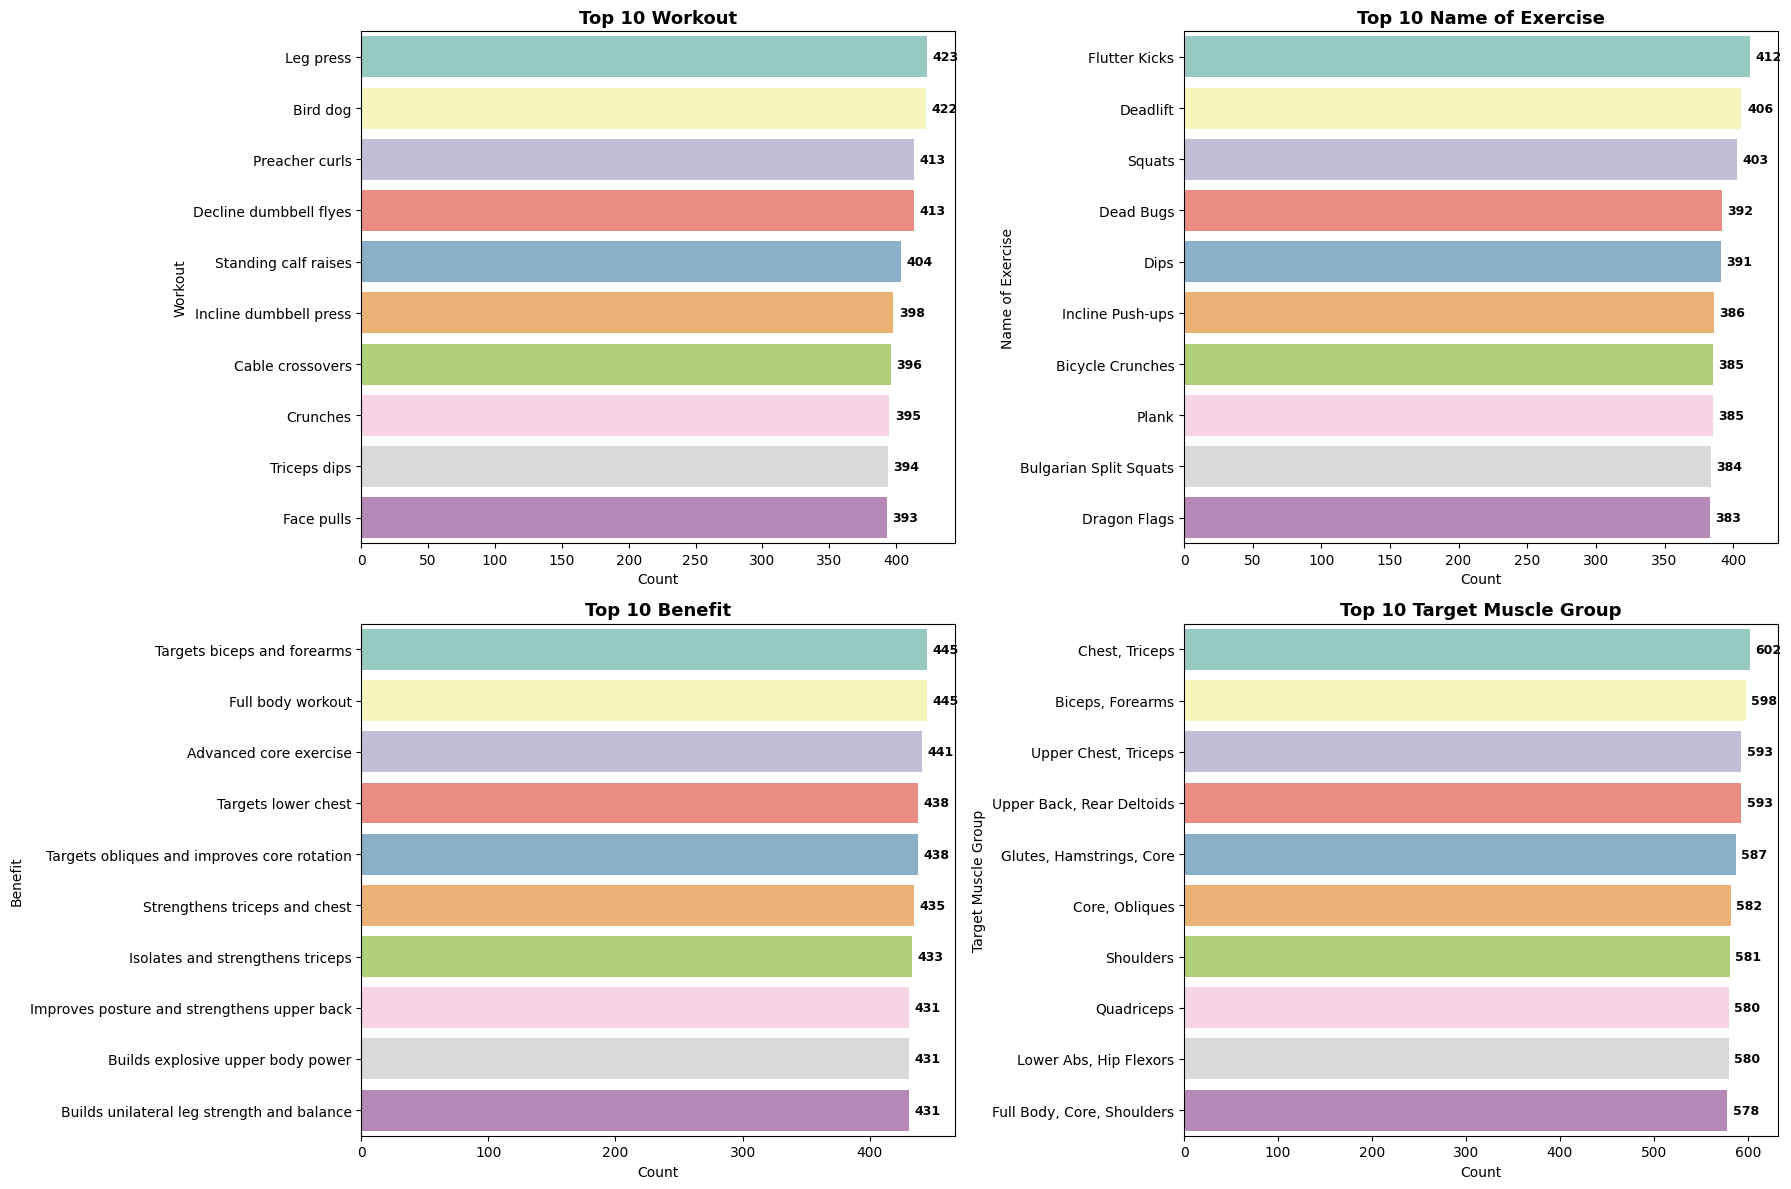

In [27]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    counts = df[col].value_counts().nlargest(10)
    ax = sns.barplot(x=counts.values, y=counts.index, palette='Set3')
    plt.title(f'Top 10 {col}', fontsize=13, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel(col)
    for j, val in enumerate(counts.values):
        ax.text(val + (0.01 * val), j, f'{int(val):,}', va='center',
                fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()